<a href="https://colab.research.google.com/github/Raynould-Joseph/NLP/blob/main/KNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Algoritum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [ ]:
iris=pd.read_csv('/content/sample_data/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
del iris['Id']

In [ ]:
iris.shape

(150, 5)

class of attributes

In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X=iris.iloc[:,:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=iris.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

# data normalisation makes mean =0 and sd =1


In [ ]:
X=preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
y_test.shape

(30,)

In [ ]:
import seaborn as sns

# drawing a heat map of the confusion matrix 

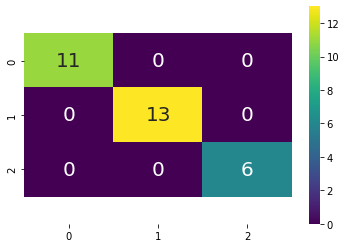

In [ ]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)



ax=sns.heatmap(cm,annot=True,cmap="viridis",annot_kws={"size":20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

# Finding the best value of k

In [ ]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    knnmodel=KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(X_train,y_train)
    predict_i=knnmodel.predict(X_test)
    error_rate.append(np.mean(y_predict1!=y_test))
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

plotind the values to the 

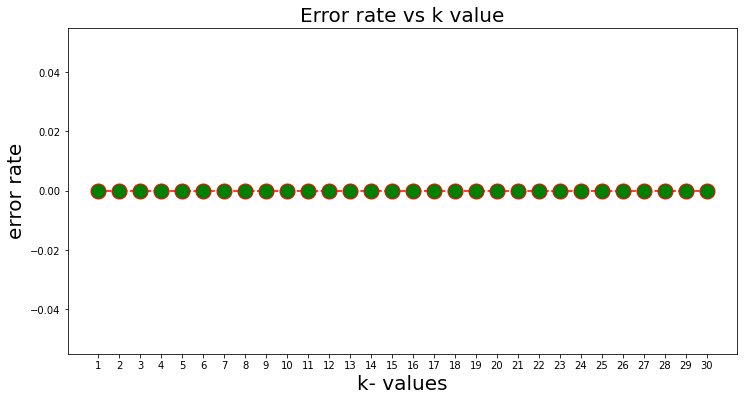

In [ ]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

# accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
acc

1.0

# confussion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test.values,y_predict1)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
cm1=pd.DataFrame(data=cm, index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,13,0
virginica,0,0,6


# output visuualsation

In [ ]:
predicted_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict'])
predicted_output

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
y_test,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica
y_predict,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica


In [ ]:
predicted_output.transpose()

,y_test,y_predict
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [ ]:
predicted_output.iloc[0,:].value_counts()

Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: y_test, dtype: int64

# value of k

In [59]:
import pandas as pd
url = (     "https://archive.ics.uci.edu/ml/machine-learning-databases"
             "/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [60]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [61]:
 abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings", ]

In [ ]:
abalone = abalone.drop("Sex", axis=1)

In [66]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Descriptive Statistics From the Abalone Dataset

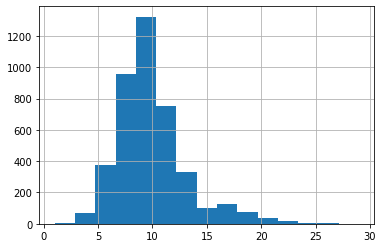

In [68]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [69]:
correlation_matrix = abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [78]:
X = abalone.drop("Rings", axis=1)
X = X.values
y = abalone["Rings"]
y = y.values

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

# You can create the NumPy array for this data point as follows:  new data point entry

In [71]:
new_data_point = np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208,])

# You now have a vector of distances, and you need to find out which are the three closest neighbors.

In [74]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644])

# Having identified the indices of the three nearest neighbors of your abalone of unknown age, you now need to combine those neighbors into a prediction for your new data point.

In [75]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10])

Average for Regression
In regression problems, the target variable is numeric. You combine multiple neighbors into one prediction by taking the average of their values of the target variable.


In [77]:
prediction = nearest_neighbor_rings.mean()
prediction


10.0

# diabetics dataset

In [81]:
dia=pd.read_csv('/content/sample_data/diabetes.csv')
print(dia.head())
print(len(dia))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
768


# replacing the data with 

In [86]:
zero_not_taken=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in zero_not_taken:
  dia[column]=dia[column].replace(0,np.NaN)
  mean=int(dia[column].mean(skipna=True))
  dia[column]=dia[column].replace(np.NaN,mean)

In [91]:
X=dia.iloc[:,0:8]
X.head()
y=dia.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
y_test.shape

(154,)

In [93]:
X=preprocessing.StandardScaler()

X_train=X.fit_transform(X_train)
X_test=X.transform(X_test)

In [94]:
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train,y_train)
y_predict1=knnmodel.predict(X_test)


In [95]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test.values,y_predict1)
cm

array([[88, 11],
       [19, 36]])

In [96]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
acc

0.8051948051948052

In [97]:
predicted_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict'])
predicted_output

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
y_test,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
y_predict,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0


In [99]:
predicted_output.transpose()

,y_test,y_predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
149,0,0
150,0,0
151,1,1
152,0,1


In [100]:
predicted_output.iloc[0,:].value_counts()

0    99
1    55
Name: y_test, dtype: int64